In [24]:
import numpy as np
from numpy import linalg as LA 
import matplotlib.pyplot as plt
%matplotlib inline

(a) Find the sample mean

In [27]:
X=np.array([(3,2,1),(2,4,5),(1,2,3),(0,2,5)])
Xmean = np.mean(X,0)
Xmean

array([ 1.5,  2.5,  3.5])

(b) Find the sample covariance matrix Q.

In [28]:
Xs = X - Xmean[None,:]
nsamp=4
Q=1/nsam*Xs.dot(Xs.T)
Q

array([[ 2.1875, -0.9375,  0.1875, -1.4375],
       [-0.9375,  1.1875, -0.4375,  0.1875],
       [ 0.1875, -0.4375,  0.1875,  0.0625],
       [-1.4375,  0.1875,  0.0625,  1.1875]])

Find the eigenvalues and eigenvectors.

In [29]:
w,v=LA.eig(Q)
w;v

array([[ 0.78195148, -0.08128939,  0.5       ,  0.36324086],
       [-0.36324086, -0.78195148,  0.5       , -0.08128939],
       [ 0.08128939,  0.36324086,  0.5       , -0.78195148],
       [-0.5       ,  0.5       ,  0.5       ,  0.5       ]])

(d) Find the PCA coefficient

Text(0,0.5,'PoV')

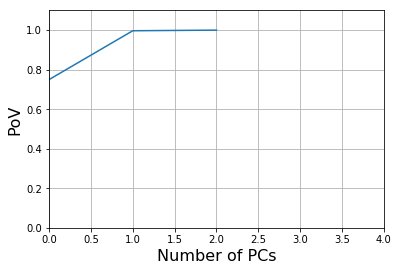

In [36]:
U,S,V = np.linalg.svd(Xs, full_matrices=False)
lam = S**2
PoV = np.cumsum(lam)/np.sum(lam)

plt.plot(PoV)
plt.grid()
plt.axis([0,nsamp,0, 1.1])
plt.xlabel('Number of PCs', fontsize=16)
plt.ylabel('PoV', fontsize=16)

(e) Reconstruct the original samples from the PCA coefficients.

In [40]:
nsvd = 3
Xhat = (U[:,:nsvd]*S[None,:nsvd]).dot(V[:nsvd,:])
Xhat = Xhat + Xmean[None,:]
Xhat.shape

(4, 3)

In [45]:
d=2
Xhati=(U[None,:d]*S[None,:d].dot(V[:d,:]) + Xmean

SyntaxError: unexpected EOF while parsing (<ipython-input-45-acb815676ba3>, line 2)

In [49]:
def pca(XMat, k):
    average = np.mean(XMat) 
    m, n = np.shape(XMat)
    data_adjust = []
    avgs = np.tile(average, (m, 1))
    data_adjust = XMat - avgs
    covX = np.cov(data_adjust.T)   #计算协方差矩阵
    featValue, featVec=  np.linalg.eig(covX)  #求解协方差矩阵的特征值和特征向量
    index = np.argsort(-featValue) #按照featValue进行从大到小排序
    finalData = []
    if k > n:
        print ("k must lower than feature number")
        return
    else:
        #注意特征向量时列向量，而numpy的二维矩阵(数组)a[m][n]中，a[1]表示第1行值
        selectVec = np.matrix(featVec.T[index[:k]]) #所以这里需要进行转置
        finalData = data_adjust * selectVec.T 
        reconData = (finalData * selectVec) + average  
    return finalData, reconData

In [50]:
Xmat=np.array([(3,2,1),(2,4,5),(1,2,3),(0,2,5)])
k=2
pca(Xmat,k)

(matrix([[-1.62914036,  0.30541739],
         [ 2.69335905, -1.2125345 ],
         [ 1.0154909 ,  1.26847156],
         [ 3.20955293,  1.56475388]]),
 matrix([[ 3.03039679,  1.96596327,  1.02322577],
         [ 2.09493917,  3.89369209,  5.07254173],
         [ 1.19666994,  1.7797793 ,  3.15027283],
         [ 0.01054041,  1.9881974 ,  5.00805378]]))